<a href="https://colab.research.google.com/github/Maher1410/gold-price-prediction/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries 📚

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [8]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [9]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
gold_data.head(10).style.background_gradient(cmap='Reds')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [12]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.tail(10).style.background_gradient(cmap='Blues')

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.800000,15.380000,1.208123
2281,5/1/2018,2654.800049,123.709999,13.610000,15.240000,1.199156
2282,5/2/2018,2635.669922,123.650002,13.670000,15.420000,1.195100
2283,5/3/2018,2629.729980,124.279999,13.820000,15.460000,1.198926
2284,5/7/2018,2672.629883,124.570000,14.100000,15.520000,1.193374
2285,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118
2289,5/16/2018,2725.780029,122.543800,14.405800,15.454200,1.182033


In [14]:
gold_data.sample(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
820,10/5/2011,1144.030029,159.460007,30.840000,29.660000,1.333992
1629,5/19/2015,2127.830078,115.889999,19.629999,16.379999,1.114666
421,12/15/2009,1107.930054,110.209999,35.930000,17.090000,1.454207
886,1/17/2012,1293.670044,160.500000,38.790001,29.190001,1.266705
1182,5/15/2013,1658.780029,134.630005,33.610001,21.760000,1.288245
1944,11/2/2016,2097.939941,123.639999,10.280000,17.559999,1.105705
546,7/6/2010,1028.060059,116.510002,32.610001,17.400000,1.263312
1816,3/18/2016,2049.580078,119.800003,10.480000,15.030000,1.131798
758,6/15/2011,1265.420044,149.119995,37.580002,34.880001,1.418198
2110,7/27/2017,2475.419922,119.790001,10.060000,15.680000,1.168866


In [15]:
gold_data.shape

(2290, 6)

In [16]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [17]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [19]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

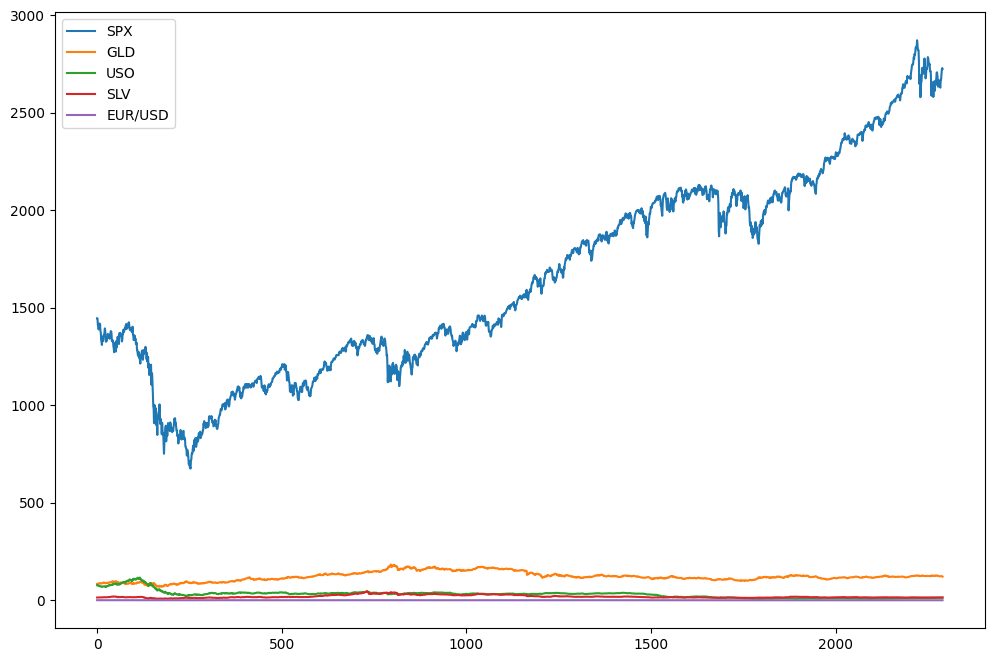

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
#plt.figure(figsize = (12, 8))

gold_data.plot()
plt.show()

In [22]:
# statistical Measures of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
gold_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [24]:
# Transpose index and columns.(Gradient background color)
gold_data.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
SPX,2290.000000,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.000000,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.000000,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.000000,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.000000,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


**we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.**

In [25]:
data = gold_data.drop(['Date'], axis=1)

In [26]:
data.mean()

SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

In [27]:
#To check for duplicates
data.duplicated().sum()

0

In [28]:
# Check for null values
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

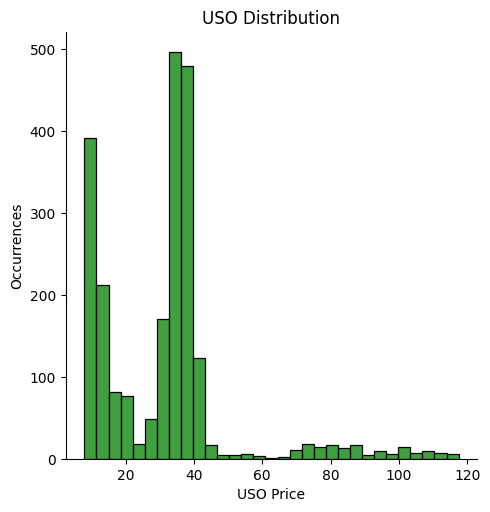

In [29]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

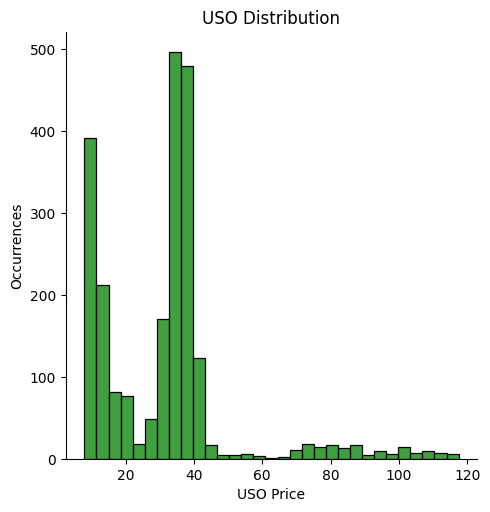

In [30]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

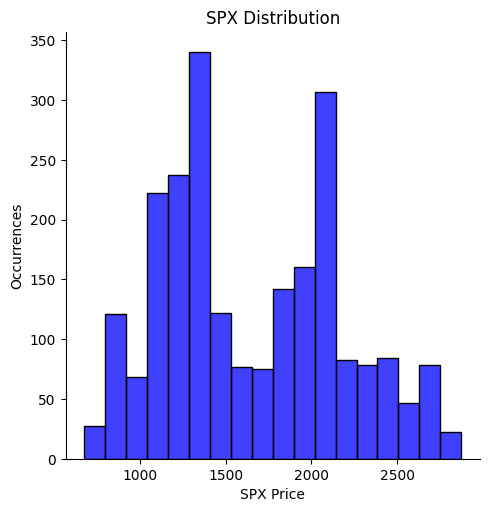

In [31]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

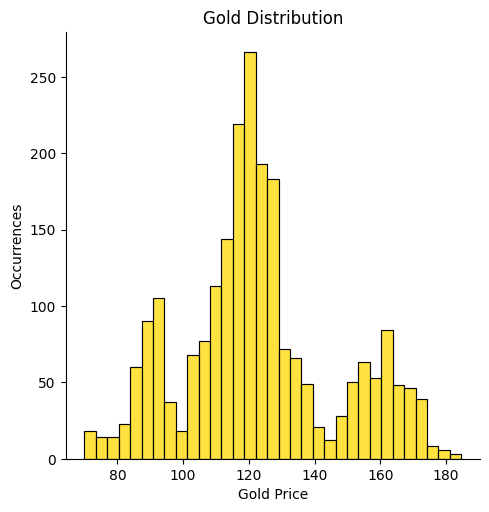

In [32]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

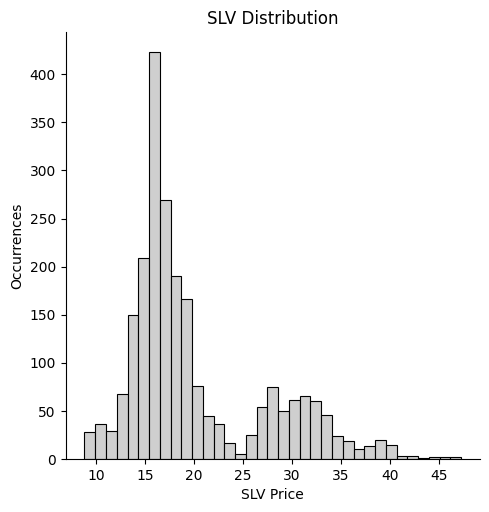

In [33]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

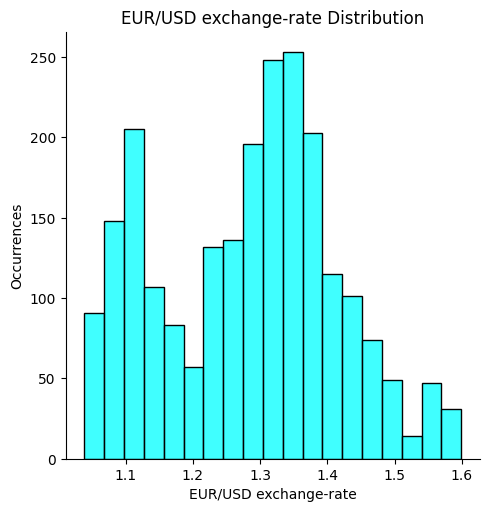

In [34]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

In [35]:
# Compute pairwise correlation of columns
# to identity the highly correlated features.
correlation = data.corr()

<Axes: >

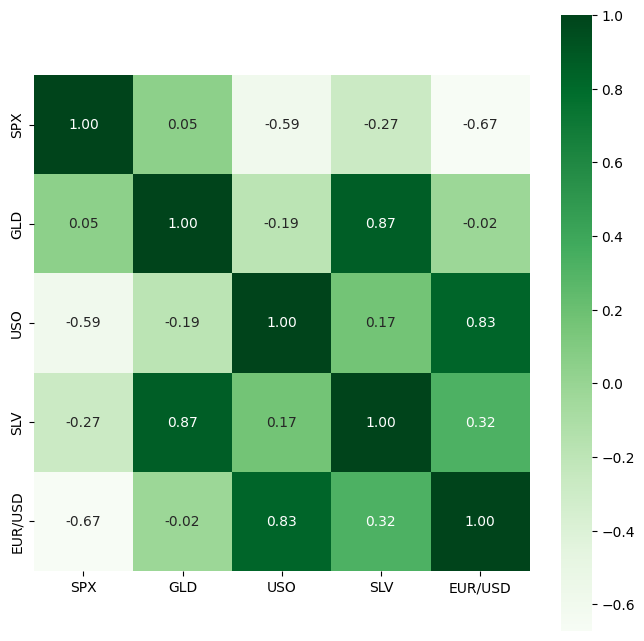

In [36]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [37]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [38]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [39]:
# The Features (input)
X
# The Features (input)(Gradient background color)
X.style.background_gradient(cmap='Reds')

In [40]:
# The target
Y
# The target(Gradient background color)
#Y.style.background_gradient(cmap='Reds')

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [41]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)


**Model Training: Random Forest Regressor**

In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
regressor

RandomForestRegressor()

In [44]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)


[127.03809952 116.85329953 139.51630027 121.8759      94.12810031
 154.83300054 117.5797011  113.58150131 153.67960086 105.5333004
 103.21089879 120.30970099  92.04039951 159.01750081 121.50469842
 117.6462009   86.69229844  91.91739933  93.01079968 125.88360004
  83.12199913 117.4284997  126.19009825 171.89619757 168.63689738
 139.16050186 114.48739952 159.92200262 133.38390041 115.63240029
 111.20270094 104.83080183 128.31770099 122.02950009  98.74869981
 120.10679969  84.99430028 115.03020007 127.57849857 140.42159848
 107.48900085 131.6525009  108.61019986 134.45180036 133.0813989
 149.39349937 119.60900059 157.28140052 156.01400159 127.61469985
 123.91130004 115.37509828 124.08010099 118.87879984 153.67840024
 121.5797992  112.43810027  86.79559974 155.67560006 118.06400099
  87.94269912 114.72090006  83.32719943 146.40759826 125.24729967
 127.23209883 125.10919986 121.09329955 168.03610155 121.7884991
 125.7552013  172.65449801 121.51340087 169.25270198 119.21920031
 127.13689953

In [47]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.9903706883557035


**Compare the Actual Values and Predicted Values in a Plot**

In [49]:
Y_test = np.array(Y_test)
#Y_test = list(Y_test) #Converting the actual values to a list,so that it can be in the same format as the test_data_prediction


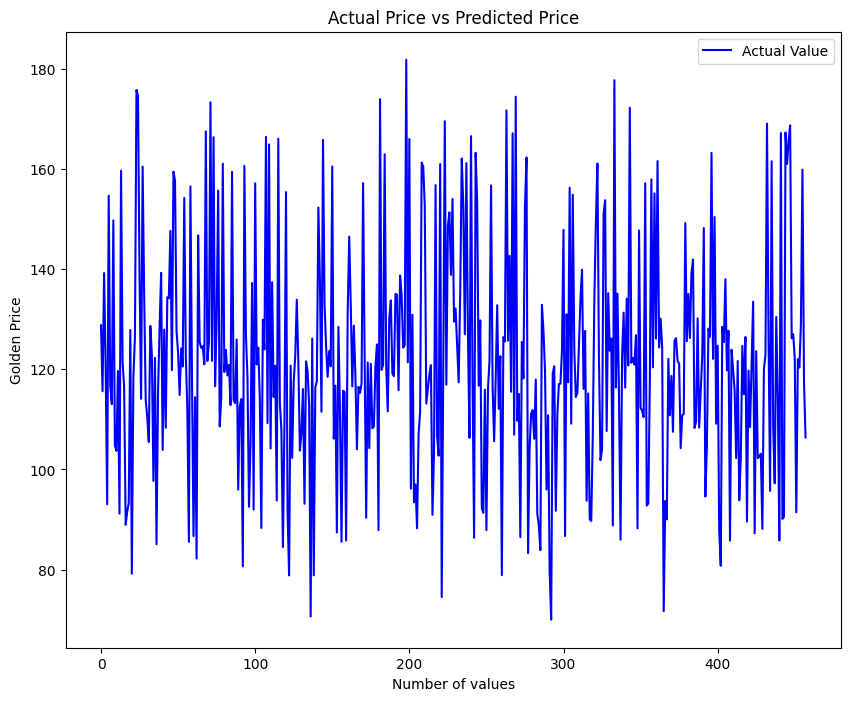

In [50]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

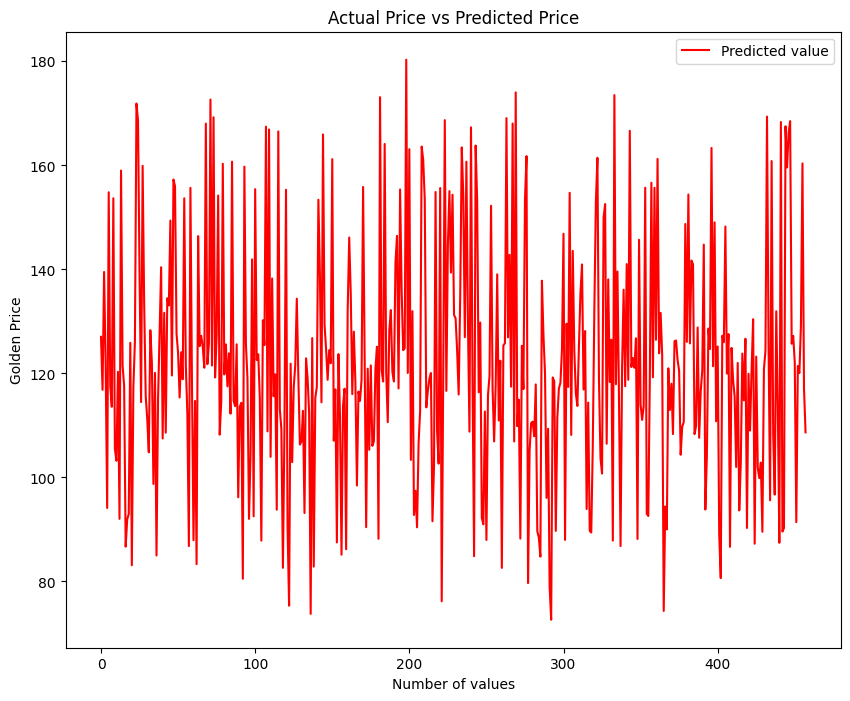

In [51]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

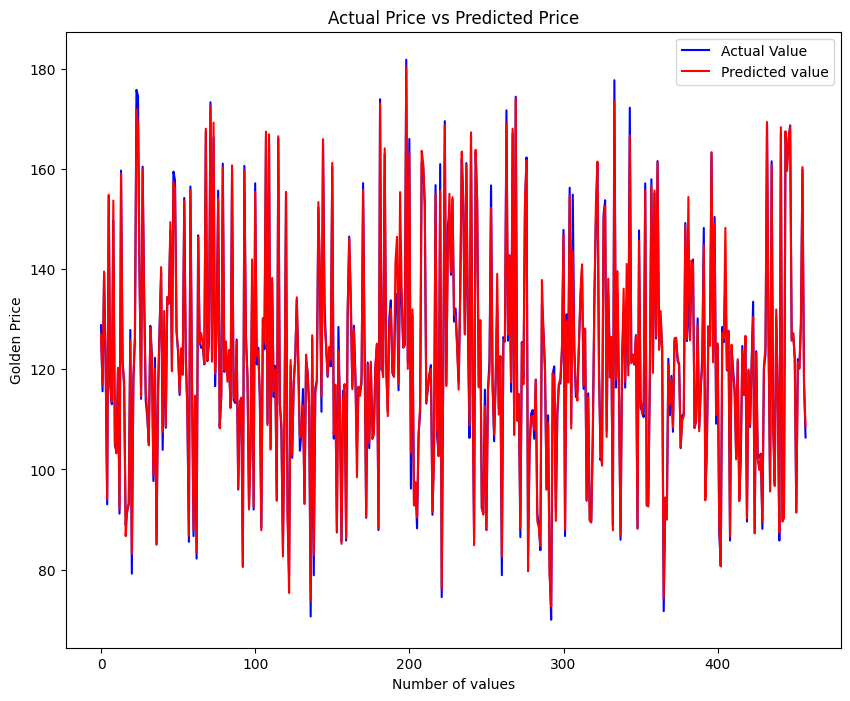

In [52]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

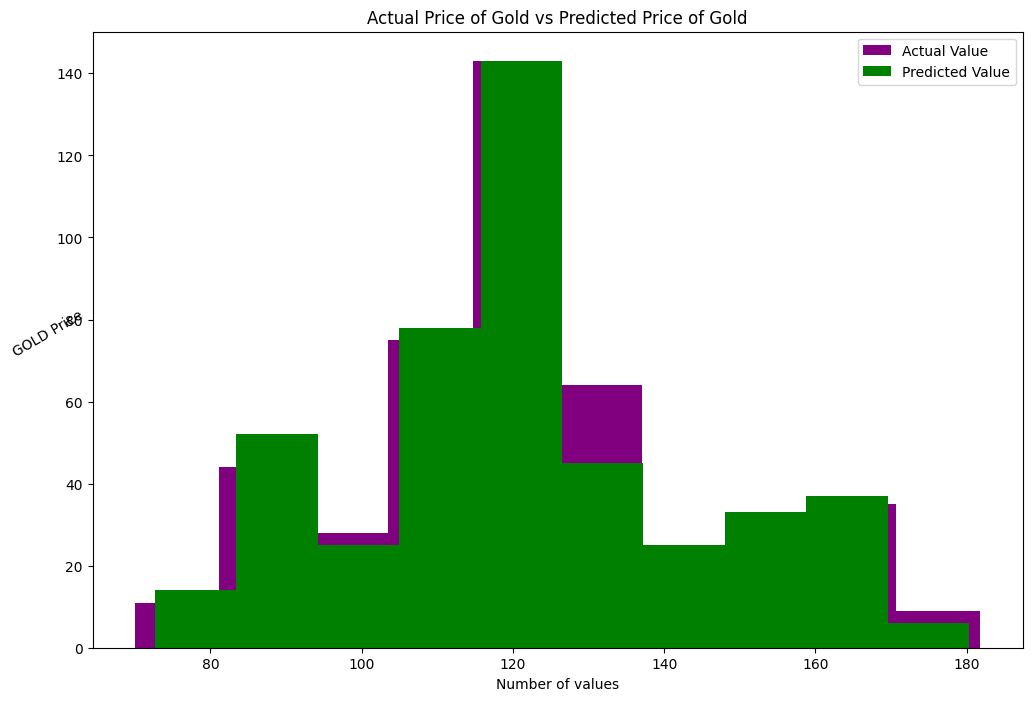

In [53]:
plt.figure(figsize = (12,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

**Building a System to use the model**

In [54]:
def convertor(user_input):

    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [61]:
print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):

    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"):
        print("END")
        break
    input_data = convertor(user_input)
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])

how many values will you calculate: (NOTE: Press q to break)
4
1310.5 70.550003 15.902 1.464794
values =  (1310.5, 70.550003, 15.902, 1.464794)
[88.06859845]
The cost of the gold is: 88.06859845000001
1336.910034 69.800003 16.674999 1.483107
values =  (1336.910034, 69.800003, 16.674999, 1.483107)
[90.75759908]
The cost of the gold is: 90.75759907999998
1556.219971 33.040001 28.02 1.298802
values =  (1556.219971, 33.040001, 28.02, 1.298802)
[153.36700435]
The cost of the gold is: 153.36700434999977
1556.219971 33.040001 28.02 1.298802
values =  (1556.219971, 33.040001, 28.02, 1.298802)
[153.36700435]
The cost of the gold is: 153.36700434999977


In [ ]:
# 1310.5 70.550003 15.902 1.464794              # row_15  ~ 88.169998
# 1336.910034 69.800003 16.674999 1.483107      # row_21  ~ 92.059998
# 1556.219971 33.040001 28.02 1.298802          # row_1144 ~ 152.990005